In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## 데이터 준비

In [8]:
# -------------------------------------------------
# data 불러오기
# -------------------------------------------------
df = pd.read_csv('../data/bike_sharing_demand.csv', parse_dates=['datetime'])

# -------------------------------------------------
# 파생컬럼 추가
# -------------------------------------------------
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # 월요일:0, 일요일:6
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


## 변수선택

In [9]:
# --------------------------------------------
# 변수선택
#   - casual, registered는 독립변수의 성격이 아니므로 선택하지 않음
#   - datetime은 선택하지 않음
#   - day 선택하지 않음(불완전, 의미없음)
#   - temp, atemp중 한가지만 선택
# --------------------------------------------

X = df.drop(['datetime','casual','registered','count', 'day', 'temp'], axis=1).copy()
y = df['count']

## 훈련세트 테스트세트 분할

In [10]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8164, 11) (2722, 11) (8164,) (2722,)


## 전처리
#### 수치형 변수 스케일링

<Axes: >

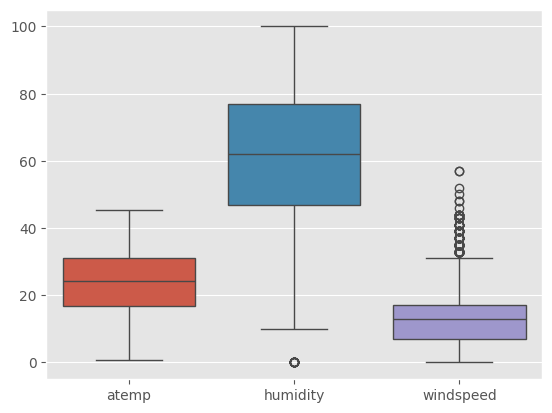

In [11]:
sns.boxplot(X_train[['atemp', 'humidity','windspeed']])

In [12]:
from sklearn.preprocessing import StandardScaler 

# -------------------------
#   전처리 대상 변수 설정
# -------------------------
numerical_features   = ['atemp', 'humidity','windspeed'] 

# -------------------------
#   스케일링
# -------------------------
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


<Axes: >

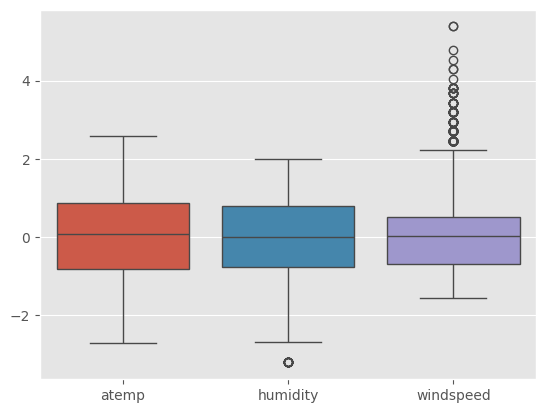

In [13]:
sns.boxplot(X_train[numerical_features])

#### 범주형 변수 원핫인코딩

In [14]:
from sklearn.preprocessing import OneHotEncoder

# -------------------------
#   전처리 대상 변수 설정
# -------------------------
categorical_features   = ['season', 'weather', 'year','month', 'hour', 'dayofweek'] 

# -------------------------
#   원핫인코딩
# -------------------------
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

# -------------------------
#   생성된 열 이름
# -------------------------
ohe_columns = ohe.get_feature_names_out(categorical_features)

# -------------------------
#   DataFrame으로 변환
# -------------------------
X_train_ohe = pd.DataFrame(X_train_ohe, 
             columns = ohe_columns,
             index = X_train.index)

X_test_ohe = pd.DataFrame(X_test_ohe, 
             columns = ohe_columns,
             index = X_test.index)




In [15]:
# -------------------------
#   최종 훈련 테스트 데이터 만들기
# -------------------------
X_train_preprocessed = pd.concat([X_train[numerical_features], X_train_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test[numerical_features], X_test_ohe], axis=1)


In [16]:
X_train_preprocessed.sample(5)

,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,...,hour_21,hour_22,hour_23,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
1275,-0.290517,0.008563,0.756064,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7667,0.872657,-1.082085,-0.217928,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9241,1.320213,0.424048,1.608511,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1908,0.246787,-0.666600,1.121515,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3847,0.425691,1.358888,-1.557372,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# LinearRegression

In [17]:
# --------------------------------------------
# 모델 생성 및 훈련
# --------------------------------------------
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# --------------------------------------------
# 예측
# --------------------------------------------
pred = model.predict(X_test_preprocessed)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f'r2:{r2}')
print(f'rmse:{rmse}')
print(f'mae:{mae}')
print(f'mse:{mse}')

# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print('train>>>>>>>>>>>>', model.score(X_train_preprocessed, y_train))
print('test>>>>>>>>>>>>>', model.score(X_test_preprocessed, y_test))

r2:0.6916702726412358
rmse:100.58600318249505
mae:74.48853952952591
mse:10117.544036228905
train>>>>>>>>>>>> 0.6948845558913053
test>>>>>>>>>>>>> 0.6916702726412358


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarni

# KNeighborsRegressor

In [18]:
# --------------------------------------------
# 모델 생성 및 훈련
# --------------------------------------------
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train_preprocessed, y_train)

# --------------------------------------------
# 예측
# --------------------------------------------
pred = model.predict(X_test_preprocessed)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f'r2:{r2}')
print(f'rmse:{rmse}')
print(f'mae:{mae}')
print(f'mse:{mse}')

# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print('train>>>>>>>>>>>>', model.score(X_train_preprocessed, y_train))
print('test>>>>>>>>>>>>>', model.score(X_test_preprocessed, y_test))


r2:0.5729221462683387
rmse:118.38137444848128
mae:82.06590742101396
mse:14014.149816311538
train>>>>>>>>>>>> 0.714348899191732
test>>>>>>>>>>>>> 0.5729221462683387


# DecisionTreeRegressor

In [19]:
# --------------------------------------------
# 모델 생성 및 훈련
# --------------------------------------------
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)

# --------------------------------------------
# 예측
# --------------------------------------------
pred = model.predict(X_test_preprocessed)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f'r2:{r2}')
print(f'rmse:{rmse}')
print(f'mae:{mae}')
print(f'mse:{mse}')


# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print('train>>>>>>>>>>>>', model.score(X_train_preprocessed, y_train))
print('test>>>>>>>>>>>>>', model.score(X_test_preprocessed, y_test))

r2:0.8153588528502266
rmse:77.83843527382876
mae:45.58817046289493
mse:6058.822005878031
train>>>>>>>>>>>> 0.9999967687295567
test>>>>>>>>>>>>> 0.8153588528502266


# RandomForestRegressor

In [20]:
# --------------------------------------------
# 모델 생성 및 훈련
# --------------------------------------------
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)

# --------------------------------------------
# 예측
# --------------------------------------------
pred = model.predict(X_test_preprocessed)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f'r2:{r2}')
print(f'rmse:{rmse}')
print(f'mae:{mae}')
print(f'mse:{mse}')


# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print('train>>>>>>>>>>>>', model.score(X_train_preprocessed, y_train))
print('test>>>>>>>>>>>>>', model.score(X_test_preprocessed, y_test))

r2:0.9067458120224823
rmse:55.317688521672856
mae:35.75872795738428
mse:3060.046663380817
train>>>>>>>>>>>> 0.9854817349799455
test>>>>>>>>>>>>> 0.9067458120224823
